<a href="https://colab.research.google.com/github/bhanupriya9916/bhanu121998/blob/main/Assignments_3_simple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from numpy.polynomial.polynomial import polyfit
from sklearn.linear_model import LinearRegression

In [88]:
# import dataset
df=pd.read_csv('/content/delivery_time.csv')
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [89]:
#EDA and Data Visualization
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [90]:
X = df['Sorting Time']
y = df['Delivery Time']

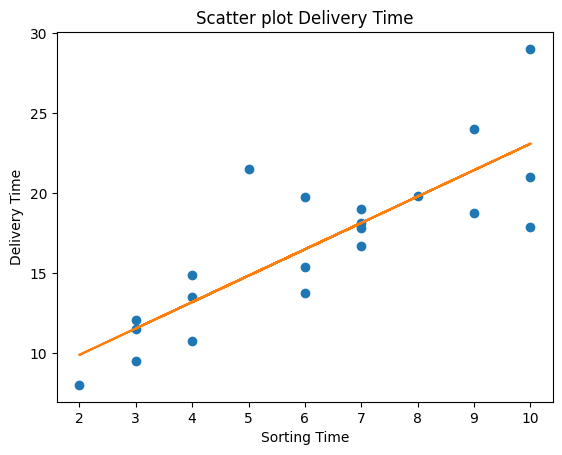

In [91]:
b, m = polyfit(x, y, 1)
plt.scatter(x, y)
plt.plot(x, y, '.')
plt.plot(x, b + m * x, '-')
plt.title('Scatter plot Delivery Time')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

In [92]:
#Feature Engineering
# Renaming Columns
df=df.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
df

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [95]:
#Correlation Analysis
df.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


In [96]:
#Regression Model
#1- No transformation

In [98]:
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.953
Method:                 Least Squares   F-statistic:                              424.5
Date:                Thu, 18 May 2023   Prob (F-statistic):                    6.12e-15
Time:                        10:38:08   Log-Likelihood:                         -57.349
No. Observations:                  21   AIC:                                      116.7
Df Residuals:                      20   BIC:                                      117.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     2.5652      0.125     20.603      0.000       2.306       2.825
==============================================================================
Omnibus:                        1.504   Durbin-Watson:                   1.305
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                0.508
Skew:                          -0.348   Prob(JB):                        0.776
Kurtosis:                       3.310   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [99]:
#2 - Log Transformation of X

In [103]:
X_log = np.log(df['sorting_time'])
model = sm.OLS(y, X_log).fit()
predictions = model.predict(X_log)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.974
Method:                 Least Squares   F-statistic:                              791.0
Date:                Thu, 18 May 2023   Prob (F-statistic):                    1.48e-17
Time:                        10:39:56   Log-Likelihood:                         -51.035
No. Observations:                  21   AIC:                                      104.1
Df Residuals:                      20   BIC:                                      105.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
sorting_time     9.6706      0.344     28.124      0.000       8.953      10.388
==============================================================================
Omnibus:                        3.656   Durbin-Watson:                   1.453
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.164
Skew:                           0.772   Prob(JB):                        0.339
Kurtosis:                       3.298   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [106]:
#3 - Log Transformation of Y
y_log = np.log(df['delivery_time'])
model = sm.OLS(y_log, x).fit()
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          delivery_time   R-squared (uncentered):                   0.917
Model:                            OLS   Adj. R-squared (uncentered):              0.912
Method:                 Least Squares   F-statistic:                              219.7
Date:                Thu, 18 May 2023   Prob (F-statistic):                    3.00e-12
Time:                        10:40:52   Log-Likelihood:                         -25.284
No. Observations:                  21   AIC:                                      52.57
Df Residuals:                      20   BIC:                                      53.61
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     0.4008      0.027     14.821      0.000       0.344       0.457
==============================================================================
Omnibus:                        2.572   Durbin-Watson:                   1.446
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                1.346
Skew:                          -0.275   Prob(JB):                        0.510
Kurtosis:                       1.889   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [109]:
#4 - Log Transformation of X & Y
model = sm.OLS(y_log, X_log).fit()
predictions = model.predict(X_log)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          delivery_time   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              688.7
Date:                Thu, 18 May 2023   Prob (F-statistic):                    5.72e-17
Time:                        10:41:41   Log-Likelihood:                         -13.899
No. Observations:                  21   AIC:                                      29.80
Df Residuals:                      20   BIC:                                      30.84
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
sorting_time     1.5396      0.059     26.244      0.000       1.417       1.662
==============================================================================
Omnibus:                        1.636   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.441   Jarque-Bera (JB):                1.137
Skew:                           0.304   Prob(JB):                        0.566
Kurtosis:                       2.035   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [111]:
#5 - Sq Root Transformation of X
x_sqrt = np.sqrt(df['sorting_time'])
model = sm.OLS(y, x_sqrt).fit()
predictions = model.predict(x_sqrt)
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                              772.0
Date:                Thu, 18 May 2023   Prob (F-statistic):                    1.88e-17
Time:                        10:42:31   Log-Likelihood:                         -51.284
No. Observations:                  21   AIC:                                      104.6
Df Residuals:                      20   BIC:                                      105.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
sorting_time     6.9466      0.250     27.785      0.000       6.425       7.468
==============================================================================
Omnibus:                        6.818   Durbin-Watson:                   1.334
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                4.599
Skew:                           1.090   Prob(JB):                        0.100
Kurtosis:                       3.708   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [113]:
y_sqrt = np.sqrt(df['delivery_time'])
model = sm.OLS(y_sqrt, x).fit()
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          delivery_time   R-squared (uncentered):                   0.930
Model:                            OLS   Adj. R-squared (uncentered):              0.927
Method:                 Least Squares   F-statistic:                              266.0
Date:                Thu, 18 May 2023   Prob (F-statistic):                    5.09e-13
Time:                        10:44:28   Log-Likelihood:                         -31.484
No. Observations:                  21   AIC:                                      64.97
Df Residuals:                      20   BIC:                                      66.01
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     0.5926      0.036     16.309      0.000       0.517       0.668
==============================================================================
Omnibus:                        1.452   Durbin-Watson:                   1.434
Prob(Omnibus):                  0.484   Jarque-Bera (JB):                1.105
Skew:                          -0.328   Prob(JB):                        0.575
Kurtosis:                       2.087   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [114]:
#7 - Square Root Transformation of X & Y
model = sm.OLS(y_sqrt, x_sqrt).fit()
predictions = model.predict(x_sqrt)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          delivery_time   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              1542.
Date:                Thu, 18 May 2023   Prob (F-statistic):                    2.10e-20
Time:                        10:44:33   Log-Likelihood:                         -13.658
No. Observations:                  21   AIC:                                      29.32
Df Residuals:                      20   BIC:                                      30.36
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
sorting_time     1.6364      0.042     39.267      0.000       1.549       1.723
==============================================================================
Omnibus:                        0.176   Durbin-Watson:                   1.461
Prob(Omnibus):                  0.916   Jarque-Bera (JB):                0.231
Skew:                          -0.179   Prob(JB):                        0.891
Kurtosis:                       2.632   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='sorting_time', ylabel='delivery_time'>

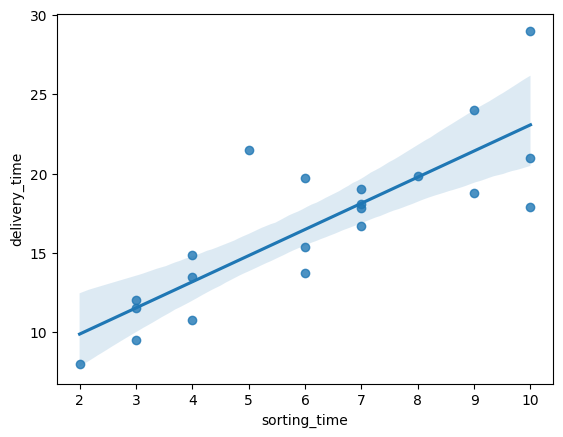

In [94]:
sns.regplot(x=df['sorting_time'],y=df['delivery_time'])

In [67]:
#Model Building
model=smf.ols("delivery_time~sorting_time",data=dataset).fit()

In [68]:
#Model Testing
# Finding Coefficient parameters
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [69]:
# Finding tvalues and pvalues
model.tvalues , model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [70]:
# Finding Rsquared Values
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [71]:
#Model Predictions
# Manual prediction for say sorting time 5
delivery_time = (6.582734) + (1.649020)*(5)
delivery_time

14.827834

In [72]:
# Automatic Prediction for say sorting time 5, 8
new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [73]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,5
1,8


In [74]:
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64

In [116]:
#SIMPLE LINEAR REGRESSION FOR SALARY DATA

In [117]:
dataset=pd.read_csv('/content/Salary_Data.csv')
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [119]:
#EDA and Data Visualization
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [121]:
x = dataset['YearsExperience']
y = dataset['Salary']

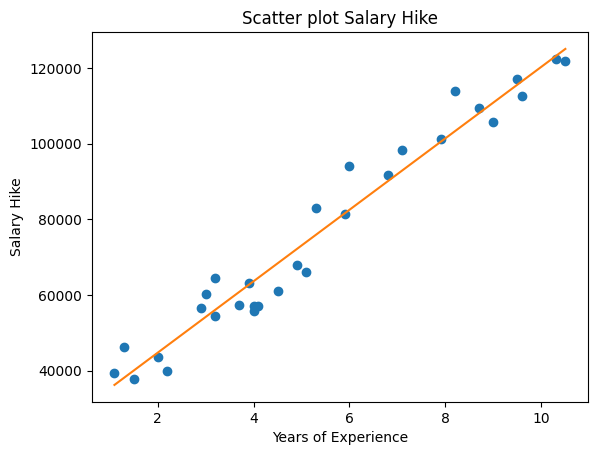

In [122]:
b, m = polyfit(x, y, 1)
plt.scatter(x, y)
plt.plot(x, y, '.')
plt.plot(x, b + m * x, '-')
plt.title('Scatter plot Salary Hike')
plt.xlabel('Years of Experience')
plt.ylabel('Salary Hike')
plt.show()

In [124]:
# CORRELATION ANALYSIS
dataset.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [126]:
# Regression Model
#1 - No transformation
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              1048.
Date:                Thu, 18 May 2023   Prob (F-statistic):                    2.56e-24
Time:                        10:48:21   Log-Likelihood:                         -327.28
No. Observations:                  30   AIC:                                      656.6
Df Residuals:                      29   BIC:                                      658.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience  1.325e+04    409.401     32.376      0.000    1.24e+04    1.41e+04
==============================================================================
Omnibus:                        0.610   Durbin-Watson:                   0.323
Prob(Omnibus):                  0.737   Jarque-Bera (JB):                0.671
Skew:                          -0.121   Prob(JB):                        0.715
Kurtosis:                       2.308   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [132]:
#2 - Log Transformation of X
x_log = np.log(dataset['YearsExperience'])
model = sm.OLS(y, x_log).fit()
predictions = model.predict(x_log)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.979
Model:                            OLS   Adj. R-squared (uncentered):              0.978
Method:                 Least Squares   F-statistic:                              1338.
Date:                Thu, 18 May 2023   Prob (F-statistic):                    8.06e-26
Time:                        10:50:36   Log-Likelihood:                         -323.70
No. Observations:                  30   AIC:                                      649.4
Df Residuals:                      29   BIC:                                      650.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience  4.909e+04   1341.796     36.583      0.000    4.63e+04    5.18e+04
==============================================================================
Omnibus:                       10.249   Durbin-Watson:                   0.421
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                8.950
Skew:                           1.106   Prob(JB):                       0.0114
Kurtosis:                       4.507   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [133]:
#3 - Log Transformation of Y
y_log = np.log(dataset['Salary'])
model = sm.OLS(y_log, x).fit()
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.809
Model:                            OLS   Adj. R-squared (uncentered):              0.802
Method:                 Least Squares   F-statistic:                              122.8
Date:                Thu, 18 May 2023   Prob (F-statistic):                    6.09e-12
Time:                        10:51:01   Log-Likelihood:                         -90.160
No. Observations:                  30   AIC:                                      182.3
Df Residuals:                      29   BIC:                                      183.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience     1.6755      0.151     11.083      0.000       1.366       1.985
==============================================================================
Omnibus:                        3.609   Durbin-Watson:                   0.016
Prob(Omnibus):                  0.165   Jarque-Bera (JB):                2.045
Skew:                          -0.389   Prob(JB):                        0.360
Kurtosis:                       1.985   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [135]:
#4 - Log Transformation of X & Y
model = sm.OLS(y_log, x_log).fit()
predictions = model.predict(x_log)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.878
Model:                            OLS   Adj. R-squared (uncentered):              0.874
Method:                 Least Squares   F-statistic:                              209.1
Date:                Thu, 18 May 2023   Prob (F-statistic):                    8.60e-15
Time:                        10:56:20   Log-Likelihood:                         -83.410
No. Observations:                  30   AIC:                                      168.8
Df Residuals:                      29   BIC:                                      170.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience     6.4461      0.446     14.461      0.000       5.534       7.358
==============================================================================
Omnibus:                        2.550   Durbin-Watson:                   0.026
Prob(Omnibus):                  0.279   Jarque-Bera (JB):                2.163
Skew:                           0.640   Prob(JB):                        0.339
Kurtosis:                       2.697   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [138]:
#5 - Sq Root Transformation of X
x_sqrt = np.sqrt(dataset['YearsExperience'])
model = sm.OLS(y, x_sqrt).fit()
predictions = model.predict(x_sqrt)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                              2697.
Date:                Thu, 18 May 2023   Prob (F-statistic):                    3.62e-30
Time:                        10:58:32   Log-Likelihood:                         -313.35
No. Observations:                  30   AIC:                                      628.7
Df Residuals:                      29   BIC:                                      630.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience   3.48e+04    670.056     51.932      0.000    3.34e+04    3.62e+04
==============================================================================
Omnibus:                        5.654   Durbin-Watson:                   0.734
Prob(Omnibus):                  0.059   Jarque-Bera (JB):                1.849
Skew:                          -0.040   Prob(JB):                        0.397
Kurtosis:                       1.786   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [141]:
#6 - Square Root Transformation of Y
y_sqrt = np.sqrt(dataset['Salary'])
model = sm.OLS(y_sqrt, x).fit()
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.906
Model:                            OLS   Adj. R-squared (uncentered):              0.902
Method:                 Least Squares   F-statistic:                              278.1
Date:                Thu, 18 May 2023   Prob (F-statistic):                    2.12e-16
Time:                        11:00:05   Log-Likelihood:                         -175.75
No. Observations:                  30   AIC:                                      353.5
Df Residuals:                      29   BIC:                                      354.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience    43.7142      2.621     16.676      0.000      38.353      49.076
==============================================================================
Omnibus:                        2.437   Durbin-Watson:                   0.046
Prob(Omnibus):                  0.296   Jarque-Bera (JB):                1.859
Skew:                          -0.445   Prob(JB):                        0.395
Kurtosis:                       2.167   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [142]:
#7 - Square Root Transformation of X & Y
model = sm.OLS(y_sqrt, x_sqrt).fit()
predictions = model.predict(x_sqrt)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              2338.
Date:                Thu, 18 May 2023   Prob (F-statistic):                    2.81e-29
Time:                        11:00:27   Log-Likelihood:                         -145.12
No. Observations:                  30   AIC:                                      292.2
Df Residuals:                      29   BIC:                                      293.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience   118.8652      2.458     48.352      0.000     113.837     123.893
==============================================================================
Omnibus:                        2.762   Durbin-Watson:                   0.231
Prob(Omnibus):                  0.251   Jarque-Bera (JB):                2.152
Skew:                           0.653   Prob(JB):                        0.341
Kurtosis:                       2.881   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='YearsExperience', ylabel='Salary'>

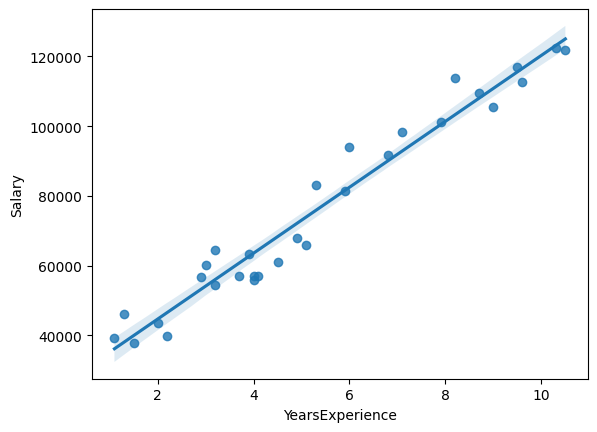

In [143]:
sns.regplot(x=dataset['YearsExperience'],y=dataset['Salary'])

In [144]:
#MODEL BUILDING
model=smf.ols("Salary~YearsExperience",data=dataset).fit()

In [145]:
#MODEL TESTING
# Finding Cefficient Parameters
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [146]:
# Finding Pvalues and tvalues
model.tvalues, model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [147]:
# Finding Rsquared values
model.rsquared , model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [148]:
#MODEL PREDICTIONS
# Manual prediction for say 3 Years Experience
Salary = (25792.200199) + (9449.962321)*(3)
Salary

54142.087162

In [149]:
# Automatic Prediction for say 3 & 5 Years Experience 
new_data=pd.Series([3,5])
new_data

0    3
1    5
dtype: int64

In [150]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,3
1,5


In [151]:
model.predict(data_pred)

0    54142.087163
1    73042.011806
dtype: float64